In [138]:
import pandas as pd
import numpy as np

In [139]:
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [140]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [141]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [142]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [143]:
df.shape

(8693, 12)

In [144]:
df=df.dropna()

In [145]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

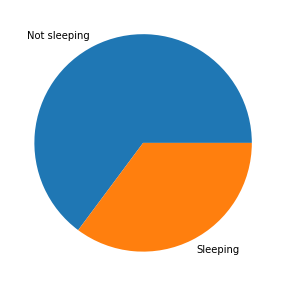

In [147]:
plt.figure(figsize=(5,5))
plt.pie(df['CryoSleep'].value_counts()/len(df)*100,labels=['Not sleeping','Sleeping'])
plt.show()

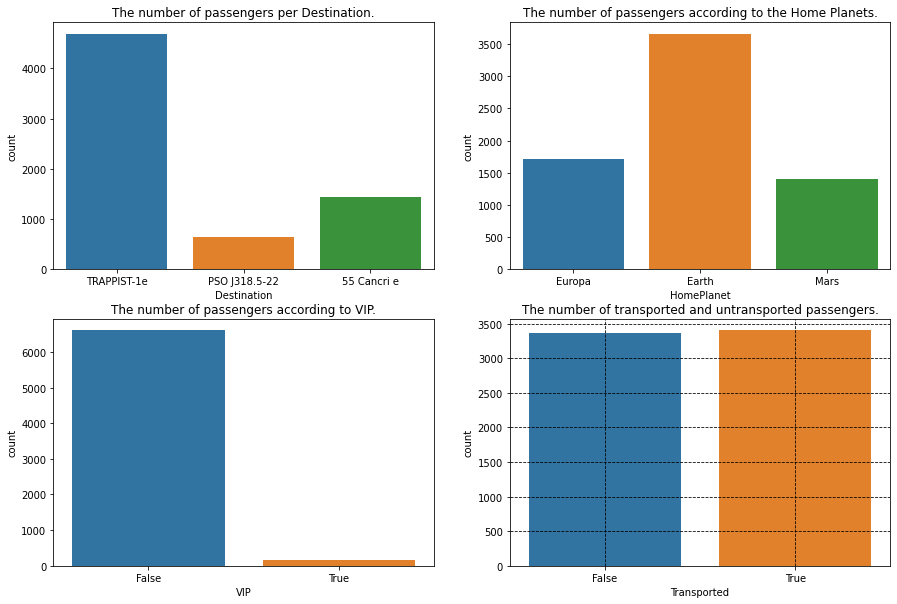

In [148]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
ax[0,0].set_title('The number of passengers per Destination.')
sns.countplot(ax=ax[0,0],x=df['Destination'])
ax[0,1].set_title('The number of passengers according to the Home Planets.')
sns.countplot(ax=ax[0,1],x=df['HomePlanet'])
ax[1,0].set_title('The number of passengers according to VIP.')
sns.countplot(ax=ax[1,0], x=df['VIP'])
ax[1,1].set_title('The number of transported and untransported passengers.')
sns.countplot(ax=ax[1,1], x=df['Transported'])
ax[1,1].grid(color='k',linestyle="--")
plt.show()

In [149]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [150]:
df[df['Age']==70].value_counts().sum()

8

In [151]:
values=[]
for i in df['Age'].values:
    values.append(i)
value=np.unique(values)
intervals=[0,5,15,25,40,60,80]
labels=['0 to 5', '5 to 15','15 to 25','25 to 40','40 to 60','60 to 80']
df['Age_categories']=pd.cut(df['Age'],intervals,labels=labels)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_categories
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,25 to 40
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,15 to 25
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,40 to 60
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,25 to 40
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,15 to 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,40 to 60
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,15 to 25
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,25 to 40
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,25 to 40


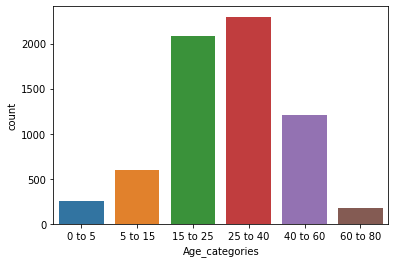

In [152]:
sns.countplot(x=df['Age_categories'])
plt.show()

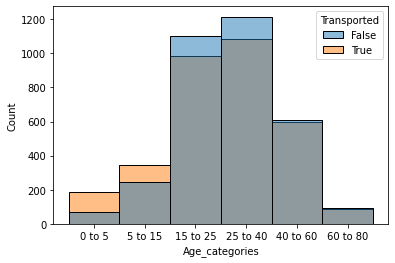

In [153]:
sns.histplot(data=df,x='Age_categories',hue='Transported')
plt.show()

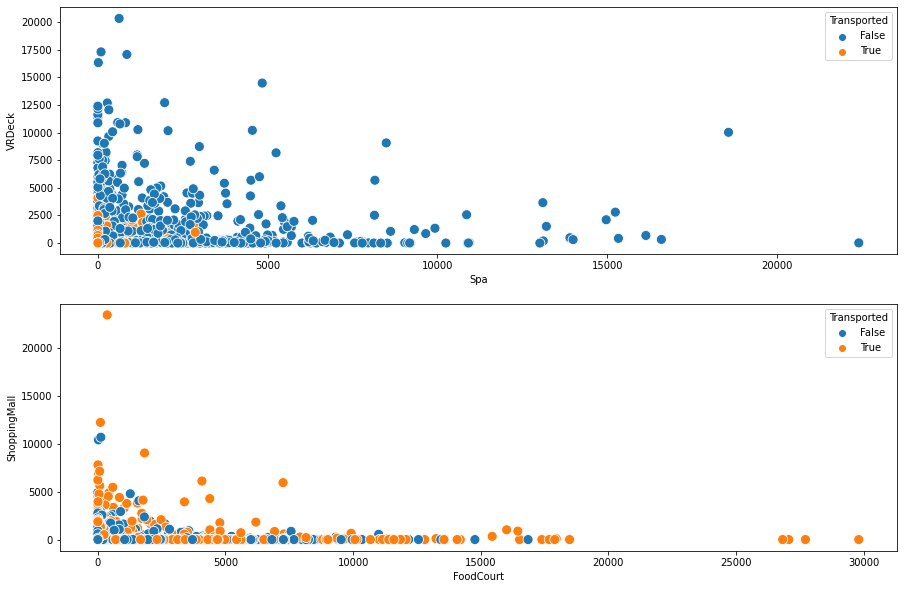

In [154]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(ax=ax[1],data=df,x='FoodCourt',y='ShoppingMall',hue='Transported',s=100)
sns.scatterplot(ax=ax[0],data=df,x='Spa',y='VRDeck',hue='Transported',s=100)
plt.show()

In [155]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)

In [156]:
df=df.drop('Age_categories',axis=1)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,138,2,39,0,0,0,0,0,0,0
1,0,0,1854,2,24,0,107,9,25,427,44,1
2,1,0,1,2,58,1,43,1063,0,1119,49,0
3,1,0,1,2,33,0,0,733,315,1012,181,0
4,0,0,1856,2,16,0,259,69,145,441,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,135,0,41,1,0,1216,0,835,74,0
8689,0,1,4381,1,18,0,0,0,0,0,0,0
8690,0,0,4386,2,26,0,0,0,879,1,0,1
8691,1,0,1809,0,32,0,0,672,0,307,972,0


In [157]:
df.corrwith(df['Transported']).abs().sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.461480
Spa             0.321987
RoomService     0.314389
VRDeck          0.293508
Destination     0.119800
HomePlanet      0.111588
Age             0.080535
Cabin           0.051891
ShoppingMall    0.043789
VIP             0.039334
FoodCourt       0.011106
dtype: float64

In [158]:
x=df.drop('Transported',axis=1)
y=df['Transported'].copy()

In [159]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_info

array([0.02319505, 0.11389493, 0.02668811, 0.00636817, 0.01306566,
       0.        , 0.07311463, 0.04469938, 0.04139164, 0.06751534,
       0.06604918])

In [160]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
milist=mutual_info.sort_values(ascending=False)
milist

CryoSleep       0.113895
RoomService     0.073115
Spa             0.067515
VRDeck          0.066049
FoodCourt       0.044699
ShoppingMall    0.041392
Cabin           0.026688
HomePlanet      0.023195
Age             0.013066
Destination     0.006368
VIP             0.000000
dtype: float64

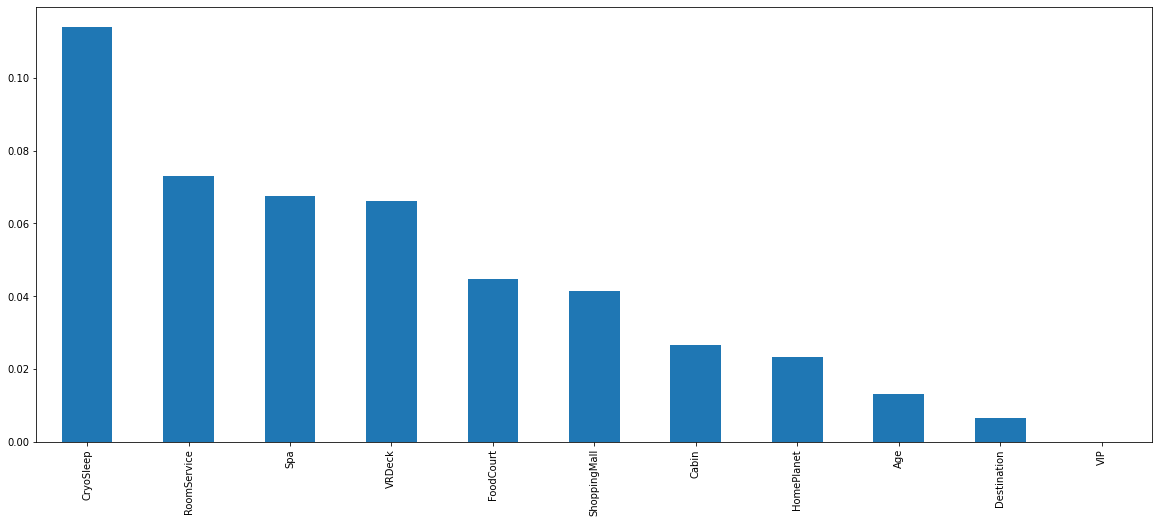

In [161]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [162]:
x.drop('VIP',axis=1,inplace=True)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x)

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [165]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [166]:
grid = [    
    {
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [500, 1000,2500]
    }
]

In [167]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(model,param_grid=grid,cv=3, verbose=True, n_jobs=-1)

In [168]:
best_clf=clf.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [169]:
best_clf.best_estimator_

LogisticRegression(C=0.004832930238571752, max_iter=1000)

In [170]:
best_clf.score(x_train,y_train)

0.7865459249676585

In [171]:
model_r=LogisticRegression(solver='liblinear',C=0.004832930238571752, max_iter=1000)
model_r.fit(x_train,y_train)

LogisticRegression(C=0.004832930238571752, max_iter=1000, solver='liblinear')

In [172]:
y_predicted=model_r.predict(x_test)

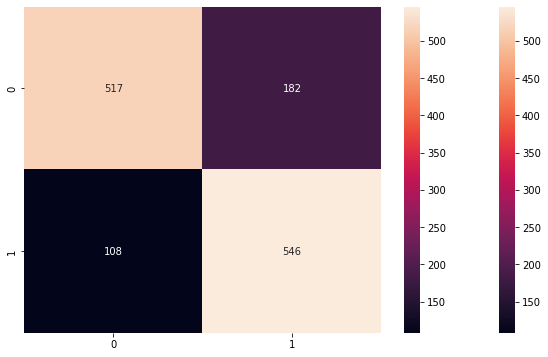

In [173]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

In [174]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       699
           1       0.75      0.83      0.79       654

    accuracy                           0.79      1353
   macro avg       0.79      0.79      0.79      1353
weighted avg       0.79      0.79      0.79      1353

Accuracy:  0.7856614929785661


In [175]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=7,max_leaf_nodes=15)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15)

In [176]:
y_predicted=dt_model.predict(x_test)

OVERALL RESULT, USING DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       699
           1       0.75      0.85      0.79       654

    accuracy                           0.79      1353
   macro avg       0.79      0.79      0.79      1353
weighted avg       0.79      0.79      0.79      1353

Accuracy:  0.7878787878787878


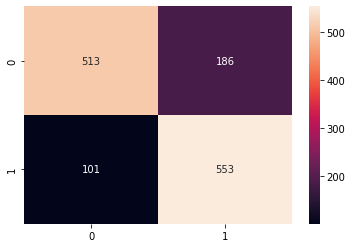

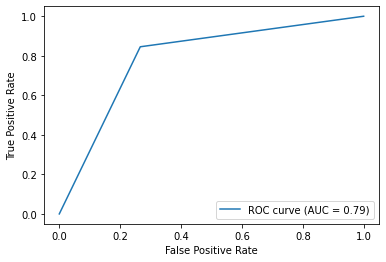

In [177]:
from sklearn import metrics
print('OVERALL RESULT, USING DecisionTreeClassifier')
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))
plt.show()

sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

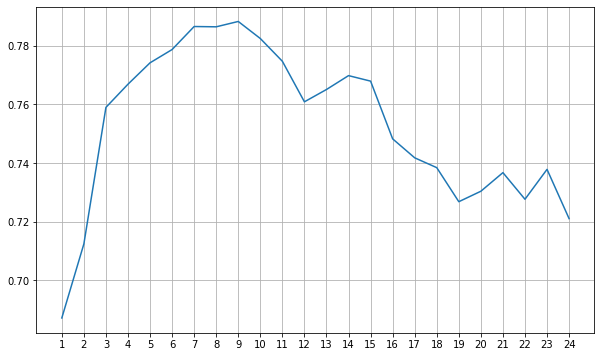

In [178]:
f1 = []
for k in range(1,25):
    dt = DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

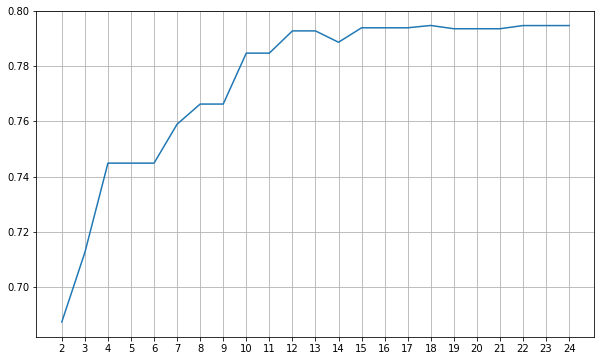

In [179]:
f1 = []
for k in range(2,25):
    dt = DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.grid()
plt.show()

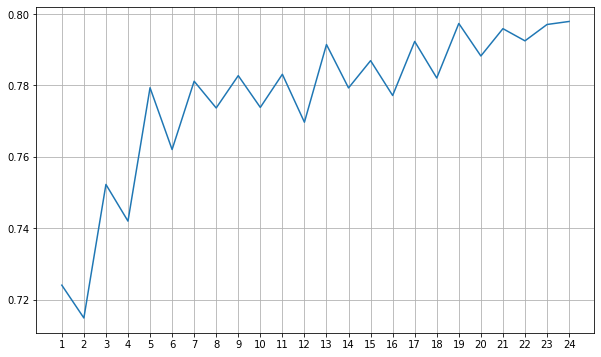

In [180]:
from sklearn.neighbors import KNeighborsClassifier
f1 = []
for k in range(1,25):
    knn_model =KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_predict = knn_model.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [181]:
kn_model=KNeighborsClassifier(n_neighbors=19)
kn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [182]:
y_predicted=kn_model.predict(x_test)

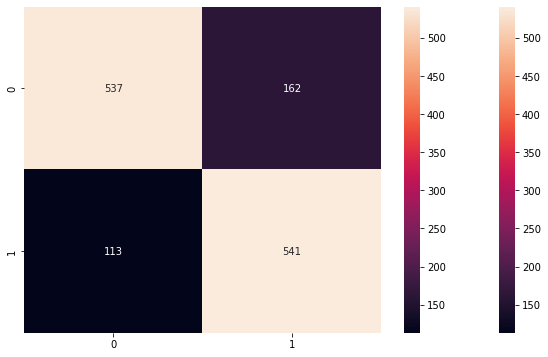

Accuracy:  0.7967479674796748


In [183]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()
print('Accuracy: ', accuracy_score(y_test,y_predicted))

In [184]:
df_test=pd.read_csv('/content/test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [185]:
names_df=pd.DataFrame(df_test['Name'])
names_df

,Name
0,Nelly Carsoning
1,Lerome Peckers
2,Sabih Unhearfus
3,Meratz Caltilter
4,Brence Harperez
...,...
4272,Jeron Peter
4273,Matty Scheron
4274,Jayrin Pore
4275,Kitakan Conale


In [186]:
def clean(df):
  df=df.drop(['PassengerId','VIP','Name'],axis=1)
  df=df.apply(LabelEncoder().fit_transform)
  df=scaler.fit_transform(df)
  return df

In [187]:
df_test=clean(df_test)

In [188]:
Prediction=kn_model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [189]:
names_df['Prediction']=pd.DataFrame(Prediction)

In [190]:
names_df

,Name,Prediction
0,Nelly Carsoning,1
1,Lerome Peckers,1
2,Sabih Unhearfus,1
3,Meratz Caltilter,1
4,Brence Harperez,1
...,...,...
4272,Jeron Peter,1
4273,Matty Scheron,1
4274,Jayrin Pore,1
4275,Kitakan Conale,1
